# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.
Answer the following questions in this notebook below and submit to your Github account.

What test is appropriate for this problem? Does CLT apply?
What are the null and alternate hypotheses?
Compute margin of error, confidence interval, and p-value.
Write a story describing the statistical significance in the context or the original problem.
Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
You can include written notes in notebook cells using Markdown:

In the control panel at the top, choose Cell > Cell Type > Markdown
Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
Resources
Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html
Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [3]:
df = data[["race", "call"]]

In [4]:
all(pd.notnull(df))

True

No missing values in race and call

Let us now calculate the number of black-sounding and white sounding resumes.

In [5]:
blackresume= len(data[data.race=='b'])
whiteresume = len(data[data.race=='w'])
print("Number of black-sounding resumes:", blackresume)
print("Number of white-sounding resumes:", whiteresume)

Number of black-sounding resumes: 2435
Number of white-sounding resumes: 2435


Finding number of black-sounding resumes that got callbacks...

In [6]:
black_calls = sum(data[data.race=='b'].call)
black_nocalls = blackresume - black_calls
print("Callbacks for black-sounding resumes:", black_calls)
print("No callbacks for black-sounding resumes:", black_nocalls)

Callbacks for black-sounding resumes: 157.0
No callbacks for black-sounding resumes: 2278.0


Finding number of callbacks for white sounding resumes...

In [7]:
white_calls = sum(data[data.race=='w'].call)
white_nocalls = whiteresume - white_calls
print("Callbacks for white-sounding resumes:", white_calls)
print("No callbacks for white-sounding resumes:", white_nocalls)

Callbacks for white-sounding resumes: 235.0
No callbacks for white-sounding resumes: 2200.0


With these numbers, we can address some of the questions below.

Q1: What test is appropriate for this problem? Does CLT apply?

White-souding callbacks proportion is (235/2435 = 0.0965) and black-sounding callbacks proportioncis (157/2435 = 0.0645). The difference in percentage points is about 3.2, and that is what we want to find if that difference is meaningful. $\chi^2$ test is appropriate for testing if the difference in proportion is statistically significant. We can also use the hypothesis test for comparing two population proportions (one for white-sounding and another for black-sounding resumes). For both white and black classes, $n \times p$ and $n \times (1-p)$ are much greater than 5. Also, the "b" and "w" are assigned randomly to all resumes. Central limit theorem can be applied to this data set.

Let's first use the $\chi^2$ test (we will later use the other test method too). We will use the significance level $\alpha = 0.01$.

Q2: What are the null and alternate hypotheses?


$H_0$: race has no effect on callback

$H_a$: race affects callback rate


First, let's create a contingency table containing callback vlaues for both white and black.

In [8]:
n = len(data)

In [11]:
Ctab = pd.DataFrame({"Black": np.array([black_calls, black_nocalls, blackresume]),
            "White": np.array([white_calls, white_nocalls, whiteresume]),
            "Row total": np.array([black_calls+white_calls, black_nocalls+white_nocalls, n])})
Ctab = Ctab[["Black", "White", "Row total"]].rename(index={0: "Call", 1: "No call", 2: "Column total"})
Ctab

,Black,White,Row total
Call,157.0,235.0,392.0
No call,2278.0,2200.0,4478.0
Column total,2435.0,2435.0,4870.0


In [12]:
Ctab.iloc[0:2, 0:2]

,Black,White
Call,157.0,235.0
No call,2278.0,2200.0


Populating the interactive namespace from numpy and matplotlib


C:\Users\uug20\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


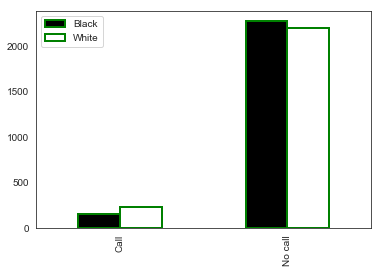

In [18]:
%pylab inline
import seaborn as sns
sns.set_style("white")
Ctab.iloc[0:2, 0:2].plot(kind="bar", colors=["black", "white"], edgecolor="green", linewidth=2.0)

Assuming $H_0$, there is no difference between black and white. Total number of callbacks (by not distinguishing black and white) is 392. Therefore, the probability of getting a call (assumimng $H_0$) is:

In [19]:
ph0 = (black_calls+white_calls)/n

In [20]:
ph0

0.08049281314168377

Using this $8\%$ probability, we can calculate the expected numbers of calls and no calls for both white and black.

In [21]:
black_calls_exp = blackresume *ph0

In [22]:
black_nocalls_exp = blackresume - black_calls_exp

In [23]:
white_calls_exp = whiteresume*ph0

In [24]:
white_nocalls_exp = whiteresume - white_calls_exp

In [26]:
cont_tab_exp = pd.DataFrame({"Black expected": np.array([black_calls_exp, black_nocalls_exp, blackresume]),
            "White expected": np.array([white_calls_exp, white_nocalls_exp, whiteresume]),
            "Row total": np.array([black_calls_exp+white_calls_exp, black_nocalls_exp+white_nocalls_exp, n])})
cont_tab_exp = cont_tab_exp[["Black expected", "White expected", "Row total"]].rename(index={0: "Call", 1: "No call", 2: "Column total"})
cont_tab_exp

,Black expected,White expected,Row total
Call,196.0,196.0,392.0
No call,2239.0,2239.0,4478.0
Column total,2435.0,2435.0,4870.0


Let's now calculate the $\chi^2$ statistic, manually

In [27]:
chisq = (((black_calls - black_calls_exp)**2.0)/black_calls_exp) \
        + (((white_calls - white_calls_exp)**2.0)/white_calls_exp) \
        + (((black_nocalls - black_nocalls_exp)**2.0)/black_nocalls_exp) \
        + (((white_nocalls - white_nocalls_exp)**2.0)/white_nocalls_exp)

In [28]:
chisq

16.879050414270225

We can also use stats.chisquare to calculate $\chi^2$ and p-value be knowing the degree of freedom, which is just 1 in this case.

In [29]:
dof = 1

In [30]:
f_obs = np.array([black_calls, black_nocalls, white_calls, white_nocalls])

In [31]:
f_exp = np.array([black_calls_exp, black_nocalls_exp, white_calls_exp, white_nocalls_exp])

In [32]:
stats.chisquare(f_obs, f_exp, ddof=dof, axis=0)

Power_divergenceResult(statistic=16.879050414270225, pvalue=0.00021615275370705055)

$\chi^2$ obtained through this approach is exactly same as what we found manually. The lower p-value confirms that we can reject the null hypothesis in favor of the alternate hypothesis that the race DOES affect the callback rates. In other words, the white-sounding resumes have higher callback rates (about 3.2 percentage points) than black-sounding resumes. Is there any confidence interval on 3.2?

Q3: Compute margin of error, confidence interval, and p-value.


Now , we use the other hypothesis test method, i.e. hypothesis test for comparing two population proportions. So, what are the sample proportions and their difference?

In [33]:
p1 = white_calls/whiteresume
p2 = black_calls/blackresume
p1 - p2

0.032032854209445585

Lets first find a 99% confidence interval around p1-p2. For that, let us first calculate the pooled std deviation. The best estimate for that can be calculated usin the sample proportions.

In [36]:
std = np.sqrt((p1*(1-p1)/whiteresume) + (p2*(1-p2)/blackresume))
std

0.0077833705866767544

In [37]:
zc = stats.norm.ppf(0.995) # z-value for 99% confidence (note that we calculate the z-value using 0.995 becasue its cumulative and both sides have 0.5%)
CI1 = (p1-p2) - (zc*std)
CI2 = (p1-p2) + (zc*std)
print("99% confidence interval:", CI1, "-", CI2)

99% confidence interval: 0.011984220171903006 - 0.05208148824698816


Since the interval does not have negative value, we are 99% confident that the white-sounding resumes get more callbacks than black-sounding ones. 

Now, lets calculate the p-value by first mentioning null and alternate hypothesis.

$H_0$: p1 - p2 = 0

$H_a$: p1 - p2 is not equal to 0

We consider a significance level $\alpha = 0.01$. So, if the probability of finding the proportion difference is less than 0.01, we will reject the null hypothsis.

Let's calculate the z score by first calculating the pooled std deviation under the null hypothesis.

In [39]:
p_null = ph0
std_null = np.sqrt(2*p_null*(1-p_null)/whiteresume)

In [40]:
std_null

0.007796894036170457

In [41]:
zscore = (p1-p2)/std_null
zscore

4.108412152434346

In [42]:
pvalue = stats.norm.sf(abs(zscore)) #onesided
pvalue

1.9919434187925383e-05

With this test too, we get the pvalue much smaller than $\alpha$. So, we can reject the null.

Q4: Write a story describing the statistical significance in the context or the original problem.

A4: With this analysis of data, racial discrimnation plays a significant role in the US labor market in terms of getting interview calls. Here 4870 resumes containing both black-sounding names and white-sounding names are presnt. 392 candidates (out of 4870) got interview calls. 157 black-sounding names and 235 white-sounding names  are in the list of callback candidates hence the interview call back depends on the race. Two separate hypothesis tests are carried out assuming the null hypothesis that there is no effect of race on callback numbers. Here the $p-$value is significantly lower than $\alpha = 0.01$. This means that we can reject the null hypothesis in favor of the alternate hypothesis that the number of interview callbacks do depend on whther the candidate's name is black-sounding or white-sounding. The difference between the white-sounding resume callback proportion and black-sounding resume callback proportion is statistically significant.The 99% confidence interval for this proportion difference is 0.012 - 0.052.      

Q5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

A5: Here the effect of race on the number of callbacks is taken into consideration. The callback number may depend on additional factors like military experience, education also. So we cannot say that the race is the most (and/or only) important factor. All factors need to be studied separately to find effect on the number of callbacks.